# Канатов Николай, 18иад

## Лабоаторная работа

## Данные для работы: https://archive.ics.uci.edu/ml/datasets/First-order+theorem+proving

Данные: имеются характеристики для доказательства теоремы, а также имеется 5 эвристик, с помощью которых доказывается теорема. Задача состоит в следующем: учитывая характеристики, указать какая из 5 эвристик даст самое быстрое доказательство теоремы.

Столбцы с 1 по 14 являются статическими характеристиками и столбцы с 15 по 53 являются динамическими характеристиками. Последние пять столбцов обозначают время в секундах, взятое каждой из пяти эвристик, чтобы доказать соответствующую теорему. Был предел времени в 100 секунд. Запись -100 означает неспособность получить доказательство в течение срока.



Для данной задачи уже предоставленны файлы с тестовыми и обучающими данным. Однако интереснее работать с 'сырыми' данными, поэтому мы будем использовать файл со всеми объектами без предобработки.

Набор данных не имеет пропущенных значений.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Чтение данных

In [2]:
data = pd.read_csv('all-data-raw.csv', sep = ',', header=None, engine = 'python')
data.columns = [u's1',u's2',u's3',u's4',u's5',u's6',u's7',u's8',u's9',u's10',u's11',u's12',u's13',u's14',
                u'd1', u'd2', u'd3', u'd4', u'd5', u'd6', u'd7', u'd8', u'd9', u'd10', u'd11', u'd12', u'd13', u'd14', u'd15',
                u'd16', u'd17', u'd18', u'd19', u'd20', u'd21', u'd22', u'd23', u'd24', u'd25', u'd26', u'd27', u'd28', u'd29',
                u'd30', u'd31', u'd32', u'd33', u'd34', u'd35', u'd36', u'd37', u'd38', u'd39', u'r1', u'r2', u'r3', u'r4', u'r5']
data.shape

(6118, 58)

В приложении к датасету указано, что в нем имеется две ненужных характеристики, это статическая характеристика в столбце 's5' и динамическая характеристика в столбце 'd21', поэтому мы исключим их из нашего набора

In [3]:
data = data.drop(['s5','d21'], axis = 1)
data.shape

(6118, 56)

In [4]:
data.head()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d35,d36,d37,d38,d39,r1,r2,r3,r4,r5
0,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.73684,0.00188,0.73872,0.073308,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
1,0.83307,0.99682,0.83307,0.76948,0.77107,0.068363,0.16057,6,1.2734,6,...,0.74248,0.00188,0.74436,0.067669,0.18797,0.08,0.08,0.2,0.08,0.08
2,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.74060,0.00188,0.74248,0.069549,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
3,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.72932,0.00188,0.73120,0.080827,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
4,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.73120,0.00188,0.73308,0.078947,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00


In [5]:
data.tail()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d35,d36,d37,d38,d39,r1,r2,r3,r4,r5
6113,0.008403,0.77311,0.058824,0.008403,0.025210,0.042017,0.93277,8,3.1597,4,...,0.017544,0.017544,0.087719,0.008772,0.90351,-100.0,-100.0,-100.0,-100.0,-100.0
6114,0.017391,0.77391,0.052174,0.017391,0.043478,0.043478,0.91304,8,3.0783,4,...,0.018349,0.018349,0.091743,0.000000,0.90826,-100.0,-100.0,-100.0,-100.0,-100.0
6115,0.026786,0.79464,0.026786,0.017857,0.035714,0.044643,0.91964,8,3.0268,4,...,0.017391,0.017391,0.086957,0.000000,0.91304,-100.0,-100.0,-100.0,-100.0,-100.0
6116,0.017857,0.79464,0.017857,0.008929,0.026786,0.044643,0.92857,8,3.0357,4,...,0.017241,0.017241,0.086207,0.000000,0.91379,-100.0,-100.0,-100.0,-100.0,-100.0
6117,0.076923,0.69231,0.076923,0.038462,0.153850,0.076923,0.76923,5,2.7692,4,...,0.000000,0.000000,0.000000,0.000000,1.00000,-100.0,-100.0,-100.0,-100.0,-100.0


## Первичная обработка

Нашей задачей является определении подходящей эвристики, на данный момент эту информацию мы можем получить из пяти последних столбцов. Намного проще работать с одним признаком, чем с пятью, поэтому добавим столбец, в котором будем хранить информацию о номере наиболее подходящей эвристики. А затем удалим пять столбцов, где записано время в секундах, поскольку с ними в дальнейшем работать уже не будем.
Если ни одна из эвристик не будет подходить для набора признаков, то в соответствующую ячейку запишим "0".

In [6]:
def getH(lst):
    min=1000
    index=-1
    for i in range(0,len(lst)):
        if lst[i]<min and lst[i]!=-100:
            min=lst[i]
            index=i
    return index+1

In [7]:
data['H']=0
for i in range(0,len(data)):
    data['H'][i]=getH([data.r1[i],data.r2[i],data.r3[i],data.r4[i],data.r5[i]])

d:\program files\miniconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
data = data.drop(['r1','r2','r3','r4','r5'], axis = 1)
table = data
data.shape

(6118, 52)

In [9]:
data.head()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
0,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.73684,0.00188,0.73872,0.073308,0.18797,0
1,0.83307,0.99682,0.83307,0.76948,0.77107,0.068363,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.74248,0.00188,0.74436,0.067669,0.18797,1
2,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.74060,0.00188,0.74248,0.069549,0.18797,0
3,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.72932,0.00188,0.73120,0.080827,0.18797,0
4,0.83307,0.99682,0.83307,0.76789,0.76948,0.069952,0.16057,6,1.2734,6,...,0.020202,0.80639,0.99624,0.80263,0.73120,0.00188,0.73308,0.078947,0.18797,0


In [10]:
data.tail()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
6113,0.008403,0.77311,0.058824,0.008403,0.025210,0.042017,0.93277,8,3.1597,4,...,0.00000,0.017544,0.47368,0.017544,0.017544,0.017544,0.087719,0.008772,0.90351,0
6114,0.017391,0.77391,0.052174,0.017391,0.043478,0.043478,0.91304,8,3.0783,4,...,0.00000,0.018349,0.44037,0.018349,0.018349,0.018349,0.091743,0.000000,0.90826,0
6115,0.026786,0.79464,0.026786,0.017857,0.035714,0.044643,0.91964,8,3.0268,4,...,0.00000,0.017391,0.41739,0.017391,0.017391,0.017391,0.086957,0.000000,0.91304,0
6116,0.017857,0.79464,0.017857,0.008929,0.026786,0.044643,0.92857,8,3.0357,4,...,0.00000,0.017241,0.40517,0.017241,0.017241,0.017241,0.086207,0.000000,0.91379,0
6117,0.076923,0.69231,0.076923,0.038462,0.153850,0.076923,0.76923,5,2.7692,4,...,0.31313,0.000000,0.75806,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0


In [11]:
data.describe()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
count,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,...,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000
mean,0.367852,0.830860,0.264259,0.300741,0.357758,0.106189,0.536053,7.081399,2.640024,7.725727,...,0.015670,0.192655,0.699686,0.134589,0.182576,0.127697,0.270410,0.046002,0.683588,1.617032
std,0.313888,0.213030,0.268266,0.263988,0.269641,0.119298,0.302384,7.303454,2.274133,7.396474,...,0.145052,0.333571,0.297221,0.250727,0.328448,0.261721,0.321667,0.100175,0.320924,1.773495
min,0.000000,0.007812,0.000000,0.000000,0.000382,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.114572,0.769408,0.101690,0.100000,0.144055,0.031915,0.250000,4.000000,1.811000,3.000000,...,0.000000,0.000000,0.546150,0.000000,0.000000,0.000000,0.046190,0.000000,0.569107,0.000000
50%,0.235290,0.911770,0.136840,0.200000,0.250895,0.069952,0.645390,5.000000,2.193600,5.000000,...,0.000000,0.025641,0.719010,0.031084,0.018868,0.014286,0.131235,0.015873,0.803685,1.000000
75%,0.593355,1.000000,0.333330,0.483870,0.500000,0.116280,0.766420,10.000000,3.034500,7.000000,...,0.020202,0.152410,1.000000,0.096898,0.126253,0.067104,0.324315,0.055118,0.910570,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.982140,0.996600,244.000000,39.070000,86.000000,...,7.888900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


В нашем случае векторизация не является необходимой, так как все признаки являются числовыми.

In [12]:
data.count(axis=0)

s1     6118
s2     6118
s3     6118
s4     6118
s6     6118
s7     6118
s8     6118
s9     6118
s10    6118
s11    6118
s12    6118
s13    6118
s14    6118
d1     6118
d2     6118
d3     6118
d4     6118
d5     6118
d6     6118
d7     6118
d8     6118
d9     6118
d10    6118
d11    6118
d12    6118
d13    6118
d14    6118
d15    6118
d16    6118
d17    6118
d18    6118
d19    6118
d20    6118
d22    6118
d23    6118
d24    6118
d25    6118
d26    6118
d27    6118
d28    6118
d29    6118
d30    6118
d31    6118
d32    6118
d33    6118
d34    6118
d35    6118
d36    6118
d37    6118
d38    6118
d39    6118
H      6118
dtype: int64

In [13]:
corrTable = data.corr()
corrTable

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
s1,1.000000,0.560917,0.155728,0.944824,0.764236,0.392727,-0.836423,-0.346052,-0.423964,-0.096020,...,-0.053085,0.761732,0.533602,-0.058304,0.753992,0.646790,0.631376,-0.093491,-0.603656,-0.051288
s2,0.560917,1.000000,-0.243085,0.553305,0.130169,0.159898,-0.179159,-0.335576,-0.312079,0.228600,...,-0.080934,0.358444,0.772265,-0.348883,0.356206,0.302235,0.115757,-0.055164,-0.098806,-0.067283
s3,0.155728,-0.243085,1.000000,0.073748,0.317164,0.372467,-0.429768,0.214845,-0.043721,-0.231214,...,-0.048571,0.167439,-0.192574,0.838963,0.152924,-0.014453,0.248503,0.242087,-0.324644,0.012292
s4,0.944824,0.553305,0.073748,1.000000,0.821001,0.144898,-0.789268,-0.328135,-0.414262,-0.052904,...,-0.050641,0.746017,0.564710,-0.075621,0.747585,0.627144,0.623199,-0.124496,-0.585781,-0.056761
s6,0.764236,0.130169,0.317164,0.821001,1.000000,0.069910,-0.919299,-0.210448,-0.408609,-0.119686,...,-0.049008,0.641810,0.246135,0.170750,0.642325,0.540804,0.715226,-0.147149,-0.670951,-0.020025
s7,0.392727,0.159898,0.372467,0.144898,0.069910,1.000000,-0.456864,-0.113029,-0.095786,-0.214923,...,-0.030679,0.357712,0.047048,0.112409,0.334814,0.345181,0.300548,0.275055,-0.387101,0.006412
s8,-0.836423,-0.179159,-0.429768,-0.789268,-0.919299,-0.456864,1.000000,0.232254,0.402155,0.191518,...,0.055805,-0.713440,-0.238046,-0.196609,-0.704866,-0.618428,-0.756354,0.022701,0.751019,0.015327
s9,-0.346052,-0.335576,0.214845,-0.328135,-0.210448,-0.113029,0.232254,1.000000,0.613235,-0.159940,...,-0.002683,-0.244335,-0.277654,0.281398,-0.253691,-0.272830,-0.206719,0.115337,0.171196,0.042063
s10,-0.423964,-0.312079,-0.043721,-0.414262,-0.408609,-0.095786,0.402155,0.613235,1.000000,-0.155441,...,0.019333,-0.291564,-0.266843,0.074737,-0.293908,-0.252475,-0.294991,0.077843,0.271376,0.030478
s11,-0.096020,0.228600,-0.231214,-0.052904,-0.119686,-0.214923,0.191518,-0.159940,-0.155441,1.000000,...,0.005974,-0.113948,0.154421,-0.144126,-0.107592,-0.100955,-0.139668,-0.147413,0.186007,-0.202562


In [14]:
corField = []
for i in corrTable:
    for j in corrTable.index[corrTable[i] > 0.9]:
        if ((i != j) and (j not in corField) and (i not in corField)):
            corField.append(j)
            print(i,j, corrTable[i][corrTable.index==j].values[0])

s1 s4 0.9448239827698052
d1 d19 1.0
d4 d25 0.9041171376669671
d4 d27 0.9440956976120498
d4 d29 0.9055857530118522
d20 d31 0.9957256059612296
d32 d35 0.99029122385487


Мы получили столбцы которые сильно коррелируют, таким образом, можем их исключить из наших данных

In [15]:
data = data.drop(['s4','d19','d4','d31','d25','d35'],axis=1)

In [16]:
corrTable = data.corr()
corField = []
for i in corrTable:
    for j in corrTable.index[corrTable[i] > 0.9]:
        if ((i != j) and (j not in corField) and (i not in corField)):
            corField.append(j)
            print(i,j, corrTable[i][corrTable.index==j].values[0])

d27 d29 0.9815138009237779


In [17]:
data = data.drop(['d27'],axis=1)
table = data

Избавимся от объектов-дубликатов, если такие имеются, т.к. дубликаты сильно повлияют на качество обучения моделей.

In [18]:
data = data.drop_duplicates(subset=table.columns.values, keep=False)
data.shape

(5270, 45)

Всего было 6118 объектов, а осталось только 5270 уникальных.

### Нормализуем данные

In [125]:
y = data['H']
data = data.drop('H',axis = 1)
data = (data - data.mean(axis = 0))/data.std(axis = 0)

In [126]:
data.describe()

,s1,s2,s3,s6,s7,s8,s9,s10,s11,s12,...,d28,d29,d30,d32,d33,d34,d36,d37,d38,d39
count,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,...,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03,5.270000e+03
mean,1.758155e-15,-7.981808e-16,9.707605e-16,-3.235868e-16,1.100195e-15,-1.315920e-15,7.550359e-16,-4.206629e-16,-9.653674e-16,-4.584147e-16,...,1.774334e-15,-8.736844e-16,1.058399e-16,1.488499e-15,-1.232326e-15,-1.235023e-15,1.833659e-15,6.579599e-16,5.986356e-16,-1.348278e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.169564e+00,-3.727579e+00,-1.005016e+00,-1.318486e+00,-8.949139e-01,-1.729732e+00,-7.974464e-01,-6.969531e-01,-8.968970e-01,-1.840839e+00,...,-2.863573e-01,-4.208455e-01,-1.712038e-01,-5.809862e-01,-2.281811e+00,-5.366667e-01,-5.060809e-01,-8.402027e-01,-4.693513e-01,-2.103732e+00
25%,-8.264677e-01,-2.970182e-01,-6.246184e-01,-7.967389e-01,-6.345824e-01,-9.139300e-01,-4.063546e-01,-3.774738e-01,-6.151213e-01,-6.606158e-01,...,-2.863573e-01,-3.716840e-01,-1.712038e-01,-5.809862e-01,-5.170306e-01,-5.366667e-01,-5.060809e-01,-7.028862e-01,-4.693513e-01,-3.712296e-01
50%,-4.029400e-01,3.814762e-01,-4.839364e-01,-3.646983e-01,-3.278074e-01,3.505627e-01,-2.759906e-01,-2.035346e-01,-3.333455e-01,-4.536970e-01,...,-2.863573e-01,-2.643272e-01,-1.712038e-01,-4.981654e-01,8.606438e-02,-4.158560e-01,-4.516786e-01,-4.390618e-01,-3.203359e-01,3.709671e-01
75%,7.439090e-01,7.861072e-01,2.439789e-01,5.188554e-01,1.127093e-01,7.712553e-01,3.758291e-01,1.442202e-01,-5.156977e-02,8.146898e-01,...,-7.002947e-02,-9.578050e-02,-1.712038e-01,-9.029403e-02,1.002662e+00,-1.320469e-01,-2.159389e-01,2.060193e-01,8.928693e-02,7.077795e-01
max,1.996406e+00,7.861072e-01,2.742006e+00,2.357600e+00,7.022103e+00,1.522380e+00,3.088099e+01,1.499467e+01,1.107857e+01,8.781276e+00,...,2.945899e+01,1.375301e+01,3.084594e+01,2.400540e+00,1.002662e+00,3.540641e+00,3.193248e+00,2.235677e+00,9.961517e+00,9.816199e-01


#### Сэмплирование данных

In [124]:
print(data[data['H'] == 0].shape[0])
print(data[data['H'] == 1].shape[0])
print(data[data['H'] == 2].shape[0])
print(data[data['H'] == 3].shape[0])
print(data[data['H'] == 4].shape[0])
print(data[data['H'] == 5].shape[0])

2149
943
425
690
540
523


In [128]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X = data
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

unique, counts = np.unique(y_ros, return_counts=True)
dict(zip(unique, counts))

7624 new random picked points


{0: 2149, 1: 2149, 2: 2149, 3: 2149, 4: 2149, 5: 2149}

In [129]:
print(X_ros.shape)
print(y_ros.shape)

(12894, 44)
(12894,)


### Разделение на тестовую и обучающую выборки

25% тестовая выборка, 75% обучающая выборка

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.25, random_state = 72)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

9670 3224


In [131]:
# дополнительно проведем скользящую проверку для каждой модели
from sklearn.model_selection import cross_val_score
score_check = {}
kfold = 5

# словарь в который запишем результат точности, каждого алгоритма
score = {}

## KNN

In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)

train_error = np.mean(y_train != train_predict)
test_error  = np.mean(y_test  != test_predict)
print(train_error, test_error)

0.018821096173733197 0.10732009925558313


### Подбор параметра k ближайших соседей

In [133]:
from sklearn.model_selection import GridSearchCV
neighbors = [i for i in range(1,30)]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': neighbors}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_neighbors)

0.14157187176835573 1


In [134]:
knn = KNeighborsClassifier(n_neighbors = best_neighbors).fit(X_train, y_train)

train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)

train_error = np.mean(y_train != train_predict)
test_error  = np.mean(y_test  != test_predict)

print(train_error, test_error)

0.018821096173733197 0.10732009925558313


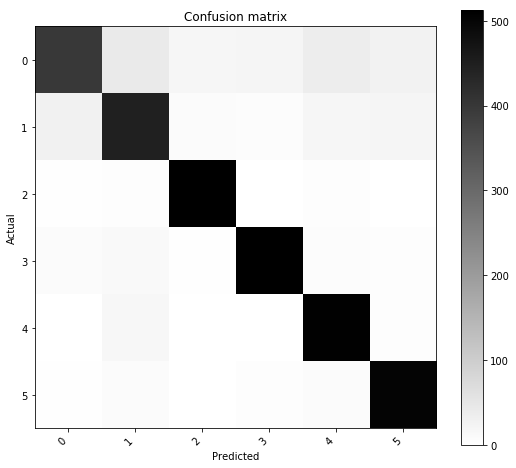

In [135]:
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt

cm = ConfusionMatrix(y_test, test_predict)
cm.plot()

In [136]:
cm.print_stats()

d:\program files\miniconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted    0    1    2    3    4    5  __all__
Actual                                          
0          400   43   20   21   37   27      548
1           30  446    9    7   20   22      534
2            3    5  513    0    6    1      528
3           10   14    4  509    7    5      549
4            1   18    2    0  507    5      533
5            4    9    2    5    9  503      532
__all__    448  535  550  542  586  563     3224


Overall Statistics:

Accuracy: 0.8926799007444168
95% CI: (0.8814822812437688, 0.9031593244076113)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.0
Kappa: 0.8712360486981093
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        0          1           2  \
Population                                  3224       3224        3224   
P: Condition positive                        548        534         528   
N: Condition negative                       2676       2690        2696   
Test outcome

In [137]:
score['knn'] = 1 - test_error

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predict, target_names = ['class 0','class 1','class 2','class 3','class 4','class 5']))

              precision    recall  f1-score   support

     class 0       0.89      0.73      0.80       548
     class 1       0.83      0.84      0.83       534
     class 2       0.93      0.97      0.95       528
     class 3       0.94      0.93      0.93       549
     class 4       0.87      0.95      0.91       533
     class 5       0.89      0.95      0.92       532

   micro avg       0.89      0.89      0.89      3224
   macro avg       0.89      0.89      0.89      3224
weighted avg       0.89      0.89      0.89      3224



Стоит отметить, что модель knn достаточно хорошо умеет предсказываеть какие объекты принадлежат классу '0' по сравнению с остальными классами.

## SVC

In [142]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

train_error = np.mean(y_train != svc.predict(X_train))
test_error  = np.mean(y_test  != svc.predict(X_test))

print(train_error, test_error)

d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.48686659772492247 0.5027915632754343


### Подбор параметров 

In [144]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

d:\program files\miniconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value 

d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: Fut

0.2611168562564633 10000.0


In [145]:
svc = SVC(C = best_C).fit(X_train, y_train)

train_error = np.mean(y_train != svc.predict(X_train))
test_error  = np.mean(y_test  != svc.predict(X_test))

print(train_error, test_error)

d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.1343329886246122 0.20905707196029777


In [146]:
score['svc'] = 1-test_error

# Random Forest

In [147]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

train_error = np.mean(y_train != rf.predict(X_train))
test_error  = np.mean(y_test  != rf.predict(X_test))

print(train_error, test_error)

0.015615305067218201 0.09522332506203474


In [148]:
score['RandomForest'] = 1-test_error

### Значимость признаков

In [149]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("feature sum: %d " % sum(importances))
print("Feature ranking:")

for f in range(len(X.columns)):
    print("%2d. feature '%5s' (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))   

feature sum: 1 
Feature ranking:
 1. feature '   d2' (0.050006)
 2. feature '  s14' (0.040704)
 3. feature '  d16' (0.039287)
 4. feature '  s12' (0.038266)
 5. feature '  d14' (0.038118)
 6. feature '  d12' (0.037984)
 7. feature '  d26' (0.037722)
 8. feature '  d10' (0.036720)
 9. feature '   d3' (0.033492)
10. feature '  d29' (0.032673)
11. feature '   d6' (0.031917)
12. feature '   d8' (0.030686)
13. feature '  d33' (0.027066)
14. feature '  d39' (0.026390)
15. feature '   s3' (0.026306)
16. feature '   s7' (0.025676)
17. feature '  d37' (0.025474)
18. feature '  d38' (0.024789)
19. feature '  d34' (0.024604)
20. feature '   s6' (0.023918)
21. feature '  d36' (0.023666)
22. feature '  s10' (0.023316)
23. feature '   s8' (0.021729)
24. feature '  d32' (0.021267)
25. feature '   s1' (0.020388)
26. feature '   s2' (0.020088)
27. feature '   d1' (0.019706)
28. feature '  d18' (0.019000)
29. feature '  d13' (0.018079)
30. feature '  s13' (0.017650)
31. feature '  d15' (0.016539)
32. fe

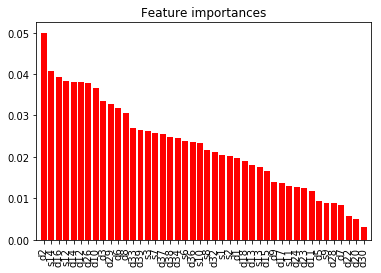

In [150]:
plt.clf()
size = len(X.columns)
plt.title("Feature importances")
plt.bar(range(size), importances[indices[:size]], align = 'center', color = 'r')
plt.xticks(range(size), X.columns[indices[:size]], rotation = 90)
plt.xlim([-1, size])
plt.show()

# Extremely Randomized Trees

In [151]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

train_error = np.mean(y_train != ert.predict(X_train))
test_error  = np.mean(y_test  != ert.predict(X_test))

print(train_error, test_error)

0.015615305067218201 0.09119106699751861


In [152]:
score['ExtremelyRandomizedTrees'] = 1-test_error

# AdaBoost

In [153]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

train_error = np.mean(y_train != ada.predict(X_train))
test_error = np.mean(y_test != ada.predict(X_test))

print(train_error, test_error)

0.5166494312306101 0.544044665012407


In [154]:
score['AdaBoost'] = 1-test_error

# GBT

In [155]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

train_error = np.mean(y_train != gbt.predict(X_train))
test_error = np.mean(y_test != gbt.predict(X_test))

print(train_error, test_error)

0.026059979317476733 0.10825062034739454


In [156]:
score['Gbt'] = 1-test_error

# Выводы

### Точность построенных моделей

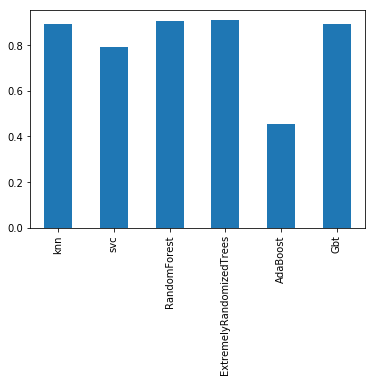

In [157]:
from pandas import DataFrame
DataFrame.from_dict(data = score, orient='index').plot(kind='bar', legend=False)
plt.show()

Как можем заметить из графика, наибольшую точность показали алгоритмы Random Forest и Extremely Randomized Trees.

Хотя, если сделать подбор параметров для каждой модели, то возможно мы сможем получить ещё большую точность.

Но какой из них лучше? На этот вопрос мы сможем ответить, получив более независимые результаты получения после кросс-валидации, т.к. эти результаты будут получены на независимой выборке.

### Результаты кросс-валидации

In [158]:
score_check['knn'] = cross_val_score(knn, X, y, cv = kfold).mean()
score_check['svc'] = cross_val_score(svc, X, y, cv = kfold).mean()
score_check['RandomForest'] = cross_val_score(rf, X, y, cv = kfold).mean()
score_check['ExtremelyRandomizedTrees'] = cross_val_score(ert, X, y, cv = kfold).mean()
score_check['AdaBoost'] = cross_val_score(ada, X, y, cv = kfold).mean()
score_check['Gbt'] = cross_val_score(gbt, X, y, cv = kfold).mean()

d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
d:\program files\miniconda\lib\site-packages\sklearn\svm\base.py:196: Fut

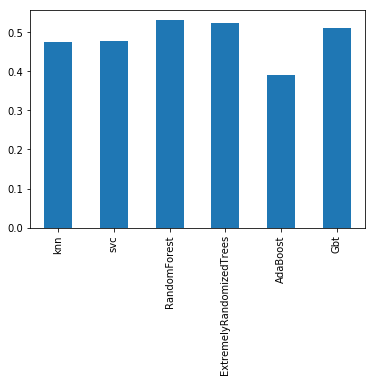

In [159]:
DataFrame.from_dict(data = score_check, orient='index').plot(kind='bar', legend=False)
plt.show()

На данном графике изображено значение точности каждой из модели на независимом наборе данных, полученные с помощью скользящего контроля. Для этого была использована функция  cross_val_score модуля cross_validation. 

Как видно из графика, лучше всего с поставленной задачей справилась модель построенная с помощью случайного леса, показав немного  большую точность, чем модели, обученные с помощью алгоритмов рандоминизированных деревьев и градиетного бустинга.
Хуже всего справилась модель AdaBoost.

In [160]:
print(score_check['RandomForest'], score_check['ExtremelyRandomizedTrees'], score_check['Gbt'])

0.5303778617116035 0.5237254983299229 0.5112147301793443


Результаты кросс-валидации говорят нам о том, что модель построенная с помощью Random Forest оказалась самой точной. Таким образом, мы можем использовать эту модель на готовых тестовых данных, предоставленных в задаче, заведомо зная, что она покажет лучший результат по сравнению с остальными моделями.

Довольно большой процент ошибки в каждой из моделей можно объяснить тем, что предоставленных данных оказалось недостаточно, или же они оказались протеворечивыми (признаки могли быть практически одинаковыми, незначительно отличающимися друг от друга, однако по данным признакам разные эвристики показали наилучший результат)

Опробуем построенную модель Random Forest на файле test.csv. В этом файле уже предоставлены готовые тестовые данные.

In [161]:
data_test = pd.read_csv('test.csv', sep = ',', header=None, engine = 'python')
data_test.shape

(1530, 57)

In [162]:
data_test.columns = [u's1',u's2',u's3',u's4',u's6',u's7',u's8',u's9',u's10',u's11',u's12',u's13',u's14',
                u'd1', u'd2', u'd3', u'd4', u'd5', u'd6', u'd7', u'd8', u'd9', u'd10', u'd11', u'd12', u'd13', u'd14', u'd15',
                u'd16', u'd17', u'd18', u'd19', u'd20', u'd22', u'd23', u'd24', u'd25', u'd26', u'd27', u'd28', u'd29',
                u'd30', u'd31', u'd32', u'd33', u'd34', u'd35', u'd36', u'd37', u'd38', u'd39', u'h1', u'h2', u'h3', u'h4', u'h5',u'h6']

Данные уже представленны без 2-х признаков, о которох было сказано в самом начале работы.


Для объекта, если не определена наилучшая эвристика, то в последнем столбце стоит 1, в противном случае, стоит -1. Последние пять столбцов с конца, не считая самый последний столбец, отвечают за одну из пяти эвристик. Соотвественно, если одна из них определена как лучшая, то записана 1, иначе -1.

Пример, где ни одна из эвристик не определена:

In [163]:
data_test[4:5]

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d36,d37,d38,d39,h1,h2,h3,h4,h5,h6
4,0.079707,0.28115,0.067832,0.063937,-0.065041,0.013117,0.052817,-0.009172,-0.02981,-0.36924,...,-0.36529,-0.30419,0.98631,0.004927,-1,-1,-1,-1,-1,1


Пример, где лучший результат показала 4-ая эвристика:

In [164]:
data_test[3:4]

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d36,d37,d38,d39,h1,h2,h3,h4,h5,h6
3,-0.68993,-0.29367,-0.57052,-0.65296,-0.84061,-0.33245,0.87885,0.26323,0.42516,-0.50533,...,-0.4899,0.22958,0.70488,-0.44661,-1,-1,-1,1,-1,-1


Заменим последние 6 столбцов на 1, в котором укажем номер самой лучшей эвристики, если такой не будет, то запишем 0.

In [165]:
def getH(lst):
    index=-1
    for i in range(0,len(lst)):
        if lst[i] == 1:
            index=i+1
    if(index==6):
        return 0
    return index

In [166]:
data_test['H']=0
for i in range(0,len(data_test)):
    data_test['H'][i]=getH([data_test.h1[i],data_test.h2[i],data_test.h3[i],data_test.h4[i],data_test.h5[i],data_test.h6[i]])

d:\program files\miniconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [167]:
data_test = data_test.drop(['h1','h2','h3','h4','h5','h6'], axis = 1)
data_test.shape

(1530, 52)

In [168]:
data_test.head()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
0,-0.715880,-3.00440,2.117800,-0.601430,2.215900,-0.537990,-1.763800,0.263230,-0.213340,-0.64141,...,-0.11229,-0.53451,-2.27430,2.07240,-0.51227,-0.43436,1.008800,-0.46486,-0.873860,3
1,-0.397340,-0.21463,-0.476530,-0.559270,0.070425,0.614320,-0.302890,-0.417770,-0.071453,-0.64141,...,0.30551,-0.57834,-1.59760,-0.54541,-0.55678,-0.48990,0.052101,0.28711,-0.140210,1
2,2.009400,0.83152,-0.570520,2.232600,1.965400,0.032973,-1.763800,-0.826370,-0.709950,-0.64141,...,-0.11229,2.41110,0.99018,-0.54541,2.47930,3.07240,2.257900,-0.46486,-2.131800,1
3,-0.689930,-0.29367,-0.570520,-0.652960,-0.840610,-0.332450,0.878850,0.263230,0.425160,-0.50533,...,0.09661,-0.57834,-0.42393,-0.54541,-0.55678,-0.48990,0.229580,0.70488,-0.446610,4
4,0.079707,0.28115,0.067832,0.063937,-0.065041,0.013117,0.052817,-0.009172,-0.029810,-0.36924,...,-0.11229,-0.44067,-0.43881,-0.51908,-0.45691,-0.36529,-0.304190,0.98631,0.004927,0


In [169]:
data_test.tail()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
1525,2.009400,0.83152,-0.64572,2.30750,2.038300,-0.13313,-1.763800,-0.82637,-0.70995,0.31119,...,-0.11229,2.41110,0.990180,-0.54541,2.47930,2.62900,2.25790,-0.46486,-2.13180,0
1526,0.062779,-0.70283,1.23150,0.28188,0.089949,-0.73375,0.206700,0.67183,0.12618,0.17510,...,-0.11229,0.68241,0.075317,1.42130,0.69724,0.89358,0.55147,-0.33409,-0.45327,0
1527,0.253910,0.66413,-0.10430,0.41880,0.201620,-0.58160,0.047736,-0.28157,-0.22237,-0.09707,...,-0.11229,-0.50266,0.990180,-0.44407,-0.47992,-0.39400,-0.70757,-0.33795,0.81584,5
1528,1.230800,0.83152,-0.51883,1.25350,1.013300,0.14717,-0.960320,-0.55397,-0.55033,0.71944,...,-0.11229,-0.53624,0.990180,-0.54541,-0.51402,-0.43655,-0.74174,-0.46486,0.88904,0
1529,2.009400,0.83152,-0.75147,2.41290,2.140800,-0.36670,-1.763800,-0.82637,-0.70995,-0.64141,...,-0.11229,2.41110,0.990180,-0.54541,2.47930,2.66320,2.25790,-0.46486,-2.13180,3


Поскольку данные, считаются уже предобработанными, то ничего с ними делать не будем и сразу запустим нашу модель Random Forest. 

На данный момент мы имеем набор объектов с 52 признаками. Однако, все наши модели были обучены для объектов с 44 характеристиками, т.к. мы отбросили часть характеристик сильно коррелирующих друг с другом. Поэтому, нам придется проделать с этими данными то же самое (Удалить характеристики, которые были исключены ранее).

In [170]:
data_test = data_test.drop(['s4','d19','d4','d31','d25','d35','d27'],axis=1)

In [171]:
real_class = data_test['H']
data_test = data_test.drop(['H'],axis=1)

In [172]:
data_test.shape

(1530, 44)

In [173]:
error  = np.mean(real_class  != rf.predict(data_test))
error

0.28169934640522876

Как мы видим, на подготовленной тестовой выборке, мы получили меньшую ошибку.

#### Предположение

Можно предположить, что если мы бы обучали наши модели на уже подготовленных данных для обучающей выборки, предоставленной в задаче, то мы бы добились большей точности. 

Проверим наше предположение, построив модель с помощью алгоритма Random Forest.

#### Проверка предположения 

Данные, находящиеся в файлах train.csv, test.csv, validation.csv уже предобработаны, поэтому мы не будем их никак обрабатывать, за исключением замены последних 6 столбцов (где в одном из них записана 1, обозначающая лучшую эвристику, а в остальных -1) на 1, в который будем записывать номер лучшей эвристики.

In [174]:
column_names = [u's1',u's2',u's3',u's4',u's6',u's7',u's8',u's9',u's10',u's11',u's12',u's13',u's14',
                u'd1', u'd2', u'd3', u'd4', u'd5', u'd6', u'd7', u'd8', u'd9', u'd10', u'd11', u'd12', u'd13', u'd14', u'd15',
                u'd16', u'd17', u'd18', u'd19', u'd20', u'd22', u'd23', u'd24', u'd25', u'd26', u'd27', u'd28', u'd29',
                u'd30', u'd31', u'd32', u'd33', u'd34', u'd35', u'd36', u'd37', u'd38', u'd39', u'h1', u'h2', u'h3', u'h4', u'h5',u'h6']
data_train = pd.read_csv('train.csv', sep = ',', header=None, engine = 'python')
data_train.columns = column_names

data_test = pd.read_csv('test.csv', sep = ',', header=None, engine = 'python')
data_test.columns = column_names
print(data_train.shape)
print(data_test.shape)


(3059, 57)
(1530, 57)


Обычно, validaton data используется для настройки гиперпараметров моделей, и эти данные не фигурируют в обучении модели. Найдем оптимальные параметры для knn и random forest.

In [175]:
data_validation = pd.read_csv('validation.csv', sep = ',', header=None, engine = 'python')
data_validation.columns = column_names

data_for_getting_parametrs = pd.concat([data_train, data_validation])
data_for_getting_parametrs.shape

(4588, 57)

In [176]:
data_for_getting_parametrs

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d36,d37,d38,d39,h1,h2,h3,h4,h5,h6
0,1.489500,0.816880,2.116800,1.783600,1.53460,-0.305430,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.463000,0.270150,-1.555900,-1,-1,-1,-1,-1,1
1,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.480100,0.213610,-1.555900,1,-1,-1,-1,-1,-1
2,1.489500,0.816880,2.116800,1.783600,1.53460,-0.305430,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.474400,0.232450,-1.555900,-1,-1,-1,-1,-1,1
3,1.489500,0.816880,2.116800,1.783600,1.53460,-0.305430,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.440100,0.345530,-1.555900,-1,-1,-1,-1,-1,1
4,1.489500,0.816880,2.116800,1.783600,1.53460,-0.305430,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.445800,0.326690,-1.555900,-1,-1,-1,-1,-1,1
5,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.463000,0.270150,-1.555900,-1,-1,-1,-1,-1,1
6,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.474400,0.232450,-1.555900,-1,-1,-1,-1,-1,1
7,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.440100,0.345530,-1.555900,-1,-1,-1,-1,-1,1
8,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.440100,0.345530,-1.555900,-1,-1,-1,-1,-1,1
9,1.489500,0.816880,2.116800,1.789500,1.54030,-0.318500,-1.247700,-0.14537,-0.593560,-0.233160,...,-0.482780,1.440100,0.345530,-1.555900,-1,-1,-1,-1,-1,1


In [177]:
data_train['H']=0
for i in range(0,len(data_train)):
    data_train['H'][i]=getH([data_train.h1[i],data_train.h2[i],data_train.h3[i],data_train.h4[i],data_train.h5[i],data_train.h6[i]])
data_train = data_train.drop(['h1','h2','h3','h4','h5','h6'], axis = 1)
data_train.shape

d:\program files\miniconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(3059, 52)

In [178]:
data_for_getting_parametrs['H']=0
for i in range(0,len(data_for_getting_parametrs)):
    data_for_getting_parametrs['H'][i]=getH([int(data_for_getting_parametrs.h1[i:i+1]),int(data_for_getting_parametrs.h2[i:i+1]),int(data_for_getting_parametrs.h3[i:i+1]),int(data_for_getting_parametrs.h4[i:i+1]),int(data_for_getting_parametrs.h5[i:i+1]),int(data_for_getting_parametrs.h6[i:i+1])])
data_for_getting_parametrs = data_for_getting_parametrs.drop(['h1','h2','h3','h4','h5','h6'], axis = 1)
data_for_getting_parametrs.shape

d:\program files\miniconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(4588, 52)

In [179]:
data_for_getting_parametrs.head()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
0,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6803,-0.48278,1.4630,0.27015,-1.5559,0
1,1.4895,0.81688,2.1168,1.7895,1.5403,-0.31850,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6974,-0.48278,1.4801,0.21361,-1.5559,1
2,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6917,-0.48278,1.4744,0.23245,-1.5559,0
3,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6575,-0.48278,1.4401,0.34553,-1.5559,0
4,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,0.026975,1.8323,0.97743,2.6676,1.6632,-0.48278,1.4458,0.32669,-1.5559,0


In [180]:
data_for_getting_parametrs.tail()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
1524,1.38650,0.83152,-0.23966,1.16080,0.92316,0.763810,-1.12100,-0.55397,-0.539690,-0.23316,...,-0.112290,-0.36328,0.99018,-0.54541,-0.33836,-0.21738,-0.56571,-0.46486,0.71176,0
1525,-0.50624,-0.58481,-0.33987,-0.49442,-0.40892,-0.090004,0.39949,0.67183,0.059521,-0.64141,...,0.305510,-0.57834,-1.34880,-0.54541,-0.55678,-0.48990,-0.53790,-0.46486,0.68376,0
1526,-0.59253,0.73765,-0.62354,-0.56530,-0.73434,-0.599120,0.88843,-0.41777,-0.334510,-0.23316,...,-0.112290,-0.28034,0.91559,-0.43858,-0.33992,-0.48990,-0.54816,-0.13433,0.59309,0
1527,-0.51839,0.43125,-0.49860,-0.39309,-0.48333,-0.642260,0.68166,-0.28157,-0.204090,2.35250,...,0.026975,-0.43072,0.34074,-0.19947,-0.40686,-0.34960,-0.37141,-0.27919,0.45935,0
1528,-0.43252,0.16421,2.73810,-0.94444,-0.60105,2.379000,-0.39452,1.76140,2.810000,-0.50533,...,-0.112290,-0.12816,0.42741,3.45760,-0.50028,-0.47708,-0.22345,3.18260,-0.74757,0


In [181]:
data_for_getting_parametrs.describe()

,s1,s2,s3,s4,s6,s7,s8,s9,s10,s11,...,d31,d32,d33,d34,d35,d36,d37,d38,d39,H
count,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,...,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000
mean,0.023212,0.037225,-0.003326,0.032532,0.027575,-0.005315,-0.022482,0.012351,-0.002801,0.004167,...,0.001404,-0.005869,-0.016987,-0.007994,-0.005982,-0.010365,0.019808,-0.002354,-0.019229,1.557977
std,0.983281,0.983569,0.995844,0.986724,0.979386,0.994887,0.980765,1.065970,0.977435,1.012888,...,1.149109,0.995796,1.004320,0.997532,0.995334,0.988672,0.983988,1.006025,0.987874,1.745003
min,-1.105200,-3.735600,-0.984110,-1.065200,-1.240100,-0.880580,-1.763800,-0.826370,-0.709950,-0.913580,...,-0.112290,-0.578340,-2.403700,-0.545410,-0.556780,-0.489900,-0.784590,-0.464860,-2.131800,0.000000
25%,-0.769650,-0.423860,-0.605570,-0.721330,-0.737830,-0.618170,-0.960320,-0.417770,-0.370540,-0.641410,...,-0.112290,-0.578340,-0.535782,-0.545410,-0.556780,-0.489900,-0.681017,-0.464860,-0.344925,0.000000
50%,-0.401910,0.425360,-0.474750,-0.347130,-0.366870,-0.306950,0.378890,-0.281570,-0.201520,-0.369240,...,-0.112290,-0.503295,0.040477,-0.417610,-0.499895,-0.435790,-0.415800,-0.305720,0.421530,1.000000
75%,0.701415,0.831520,0.256640,0.701460,0.562390,0.071749,0.717630,0.399430,0.164970,-0.097070,...,0.026975,-0.145877,0.990180,-0.151072,-0.192437,-0.243520,0.183415,0.087767,0.663420,3.000000
max,2.009400,0.831520,2.738100,2.644800,2.366200,7.194500,1.439300,32.270000,15.495000,10.654000,...,54.273000,2.411100,0.990180,3.457600,2.479300,3.298200,2.257900,9.561500,0.932190,5.000000


In [182]:
y_param = data_for_getting_parametrs['H']
X_param = data_for_getting_parametrs.drop('H',axis = 1)
y = data_train['H']
X = data_train.drop('H',axis = 1)

#### Разделение на выборки

In [183]:
from sklearn.model_selection import train_test_split

X_param_train, X_param_test, y_param_train, y_param_test = train_test_split(X_param, y_param, test_size = 0.2, random_state = 117)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 29)

print('Number of instance for training models: ', X_train.shape[0], X_test.shape[0])
print('Number of instance for getting params: ', X_param_train.shape[0], X_param_test.shape[0])

Number of instance for training models:  2753 306
Number of instance for getting params:  3670 918


### KNN

In [184]:
neighbors = [i for i in range(1,50,5)]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': neighbors}, cv=5)
grid.fit(X_param_train, y_param_train)

best_cv_err = 1 - grid.best_score_
best_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_neighbors)

0.5433242506811988 41


In [185]:
knn = KNeighborsClassifier(n_neighbors = best_neighbors).fit(X_train, y_train)

train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)

train_error = np.mean(y_train != train_predict)
test_error  = np.mean(y_test  != test_predict)

print(train_error, test_error)

0.4736650926262259 0.5228758169934641


### Random Forest

In [186]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

train_error = np.mean(y_train != rf.predict(X_train))
test_error  = np.mean(y_test  != rf.predict(X_test))

print(train_error, test_error)

0.01634580457682528 0.43137254901960786


#### Результат

Как оказалось, наше предположение оказалось ложным. А это значит, что самим обработав 'сырые' данные, у нас получилось  построить и обучить на этих данных модель, работающую более точно.

## Нейронная сеть 

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.25, random_state = 72)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

9670 3224


In [192]:
from sklearn.neural_network import MLPClassifier


Обучение классификатора

Построем сеть с одним скрытым слоем, в котором будет находиться 100 нейронов

In [193]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs',
                          activation = 'logistic', random_state = 13)
mlp_model.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=13, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Проверяем на качество обучение

In [194]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.6167528438469493 0.5747518610421837


К сожалению, классификатор очень плохо справился со своей задачей. Попробуем подобрать оптимальные параметры для обучения классификатора, чтобы увеличить точность предсказаний

#### Нахождение оптимального колличества нейронов

In [195]:
layers_arr=[]
train_err=[]
test_err=[]
layers_arr = np.arange(10,250,10)
for layers in layers_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (layers),
                              solver = 'lbfgs', activation = 'logistic', random_state = 13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))


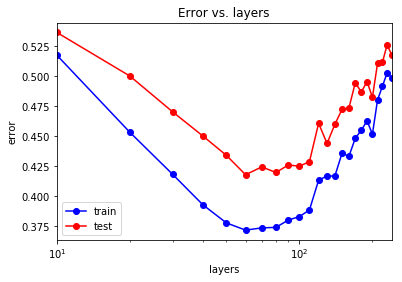

In [196]:
plt.semilogx(layers_arr, train_err, 'b-o', label = 'train', color='blue')
plt.semilogx(layers_arr, test_err, 'r-o', label = 'test', color='red')
plt.xlim([np.min(layers_arr),np.max(layers_arr)])
plt.title('Error vs. layers')
plt.xlabel('layers')
plt.ylabel('error')
plt.legend()
plt.show();

In [197]:
best_layers = layers_arr[test_err == np.min(test_err)]
print(best_layers)

[60]


Нейронная сеть при найденном  оптимальном количестве нейронов

In [198]:
mlp_model = MLPClassifier(hidden_layer_sizes = best_layers,
                          solver = 'lbfgs', activation = 'logistic', random_state = 2)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain_new = np.mean(y_train != y_train_pred)
errTest_new = np.mean(y_test != y_test_pred)
print(errTrain_new)
print(errTest_new)

0.35760082730093073
0.4109801488833747


#### Подбор alpha при оптимальном количестве нейронов

In [199]:
alpha_arr = np.linspace(0.0001, 0.1, 60)
test_err = []
train_err = []
for alp in alpha_arr:
    mlp_model = MLPClassifier(alpha = alp, hidden_layer_sizes = best_layers,
                              solver = 'lbfgs', activation = 'logistic', random_state = 13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

alpha_opt = alpha_arr[test_err == min_test_err]
print("Оптимальное значение alpha = {}".format(alpha_opt))

0.36297828335056875 0.4084987593052109
Оптимальное значение alpha = [0.06952203]


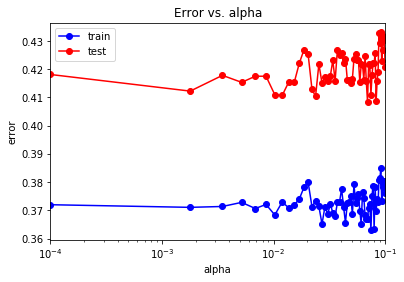

In [200]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train', color='blue')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test', color='red')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
plt.show()

Значения ошибок при оптимальных параметрах

In [201]:
print(np.min(train_err), np.min(test_err))

0.36297828335056875 0.4084987593052109


Мы получили ожидаемые результаты, приблизительно похожие на полученные результаты в первой части работы.
Стоит заметить, что исходя из полученных выше графиков можно сделать вывод о том, что переобучение отсутствует, так как не происходит подгонки по обучающему набору. На них не отражен такой момент, когда бы ошибка на обучающей выборке продолжала  падать, а на тестовой - расти. 

### Нейронная сеть с двумя скрытыми слоями

In [202]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,50), alpha = alpha_opt[0],
                          solver = 'lbfgs', activation = 'logistic', random_state = 43)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
train_err = np.mean(y_train != y_train_pred)
test_err = np.mean(y_test != y_test_pred)
print(train_err)
print(test_err)

0.40734229576008274
0.4423076923076923


#### Подбор параметров

#### Нахождение оптимального колличества нейронов

In [204]:
layers_arr = [(x, y) for x in range(50, 150, 20) for y in range(40, 100, 20)]
test_err = []
train_err = []
n_number = []
for n in layers_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = n, alpha = alpha_opt[0],
                              solver = 'lbfgs', activation = 'logistic', random_state = 13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    n_number.append(n)

In [205]:
min_test_err = np.min(test_err)
best_layers_arr = [n_number[i] for i in range(0, len(n_number)) if test_err[i] == min_test_err]
print("Оптимальное количество нейронов = {}".format(best_layers_arr))

Оптимальное количество нейронов = [(70, 40)]


In [206]:
min_train_err = np.min(train_err)
print(min_train_err, min_test_err)

0.3889348500517063 0.43610421836228286


#### Подбор alpha при оптимальном количестве нейронов

In [207]:
alpha_arr = np.linspace(0.0001, 0.1, 60)
test_err = []
train_err = []
for alp in alpha_arr:
    mlp_model = MLPClassifier(alpha = alp, hidden_layer_sizes = best_layers_arr[0],
                              solver = 'lbfgs', activation = 'logistic', random_state = 13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

alpha_opt_arr = alpha_arr[test_err == min_test_err]
print("Оптимальное значение alpha = {}".format(alpha_opt_arr))

0.372182006204757 0.4128411910669975
Оптимальное значение alpha = [0.01195254]


### Итоговая модель

Оптимальное значение слоев
Мы получили, что нейронная сеть с двумя скрытыми слоями имет немного меньшую точность, чем нейронная сеть с одним слоем
Поэтому для прогонки на тестовых данных мы будем использовать один скрытый слой

In [208]:
mlp_model = MLPClassifier(hidden_layer_sizes = best_layers[0], alpha = alpha_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 13)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain_new = np.mean(y_train != y_train_pred)
errTest_new = np.mean(y_test != y_test_pred)
print(errTrain_new)
print(errTest_new)

0.3670113753877973
0.4084987593052109


In [209]:
data_test = pd.read_csv('test.csv', sep = ',', header=None, engine = 'python')
data_test.shape

(1530, 57)

In [210]:
data_test.columns = [u's1',u's2',u's3',u's4',u's6',u's7',u's8',u's9',u's10',u's11',u's12',u's13',u's14',
                u'd1', u'd2', u'd3', u'd4', u'd5', u'd6', u'd7', u'd8', u'd9', u'd10', u'd11', u'd12', u'd13', u'd14', u'd15',
                u'd16', u'd17', u'd18', u'd19', u'd20', u'd22', u'd23', u'd24', u'd25', u'd26', u'd27', u'd28', u'd29',
                u'd30', u'd31', u'd32', u'd33', u'd34', u'd35', u'd36', u'd37', u'd38', u'd39', u'h1', u'h2', u'h3', u'h4', u'h5',u'h6']

In [211]:
def getH(lst):
    index=-1
    for i in range(0,len(lst)):
        if lst[i] == 1:
            index=i+1
    if(index==6):
        return 0
    return index

In [212]:
data_test['H']=0
for i in range(0,len(data_test)):
    data_test['H'][i]=getH([data_test.h1[i],data_test.h2[i],data_test.h3[i],data_test.h4[i],data_test.h5[i],data_test.h6[i]])

d:\program files\miniconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [213]:
data_test = data_test.drop(['h1','h2','h3','h4','h5','h6'], axis = 1)
data_test = data_test.drop(['s4','d19','d4','d31','d25','d35','d27'],axis=1)
data_test.shape

(1530, 45)

In [214]:
real_class = data_test['H']
data_test = data_test.drop(['H'],axis=1)

In [215]:
error_test_data  = np.mean(real_class  != mlp_model.predict(data_test))
error_test_data

0.4235294117647059

В итоге получили ошибку больше, чем в первой части лабораторной работе

## Метрики качества

In [216]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[340  59  67  39  51  30]
 [ 44 219  29  47  57  38]
 [ 32  74 367  41  39  30]
 [ 36  39  19 335  18  30]
 [ 50  71  13  22 307  65]
 [ 46  72  33  65  61 339]]


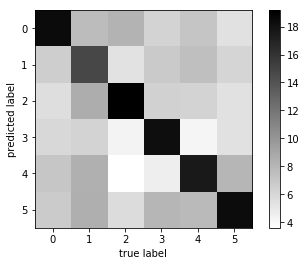

In [217]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(6))
plt.yticks(range(6))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
plt.show();

In [218]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60       548
           1       0.50      0.41      0.45       534
           2       0.63      0.70      0.66       528
           3       0.70      0.61      0.65       549
           4       0.58      0.58      0.58       533
           5       0.55      0.64      0.59       532

   micro avg       0.59      0.59      0.59      3224
   macro avg       0.59      0.59      0.59      3224
weighted avg       0.59      0.59      0.59      3224



Количество неверно определенных подходящий для признаков эвристик

In [224]:
err_number = 0
num=0
for i in range(N_test):
    features = X_test[i:i+1]
    cls = y_test[i:i+1]
    cls_pred = mlp_model.predict(features)
    num+=1
    if cls_pred[0] != cls[0]:
        err_number +=1

In [225]:
print("Неверно определено ",err_number," из ", N_test)

Неверно определено  1317  из  3224


### Вывод

По проделанной работе можно сделать следующий вывод: предоставленных данных оказалось недостаточно, или же они оказались протеворечивыми (признаки могли быть практически одинаковыми(незначительно отличающимися друг от друга), однако по данным признакам разные эвристики показали наилучший результат). 

Также следует заметить, что имеется сильный перевес объектов с нулевым классом, поэтому достигнутые результаты возможно могут быть улучшены, но это не точно, путем добавления новых элементов, чтобы объектов каждого класса было примерно равное количество.

Одна из возможных причин плохо обученного классификатора может быть не верно подобранные веса. Особым свойством нейронных сетей является то, что их веса задаются случайным образом перед началом обучения и случайная инициализация влияет на процесс обучения модели. Это означает, что даже при использовании одних и тех же параметров мы можем получить очень разные модели, задавая разные стартовые значения генератора псевдослучайных чисел.

## Лабораторная работа №3

### Random Forest

In [227]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.015615305067218201 0.09088089330024814


#### Подбор параметров

In [228]:
n_estimators_arr = np.arange(1,300,10) 
test_err = []
train_err = []
oob_err = []
for n_estimators in n_estimators_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = n_estimators, oob_score=True, random_state = 42)
    rf.fit(X_train, y_train)
    
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This p

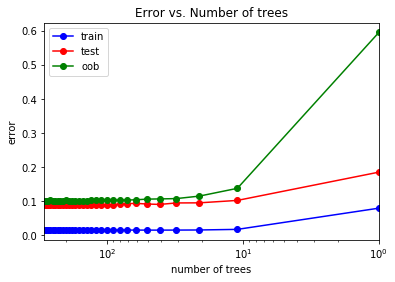

In [229]:
plt.semilogx(n_estimators_arr, train_err, 'b-o', label = 'train')
plt.semilogx(n_estimators_arr, test_err, 'r-o', label = 'test')
plt.semilogx(n_estimators_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(n_estimators_arr), np.min(n_estimators_arr)])
plt.title('Error vs. Number of trees')
plt.xlabel('number of trees')
plt.ylabel('error')
plt.legend()
pass

In [233]:
n_estimators_arr = np.arange(10,300,10) 
test_err = []
train_err = []
oob_err = []
for n_estimators in n_estimators_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = n_estimators, oob_score=True, random_state = 42)
    rf.fit(X_train, y_train)
    
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


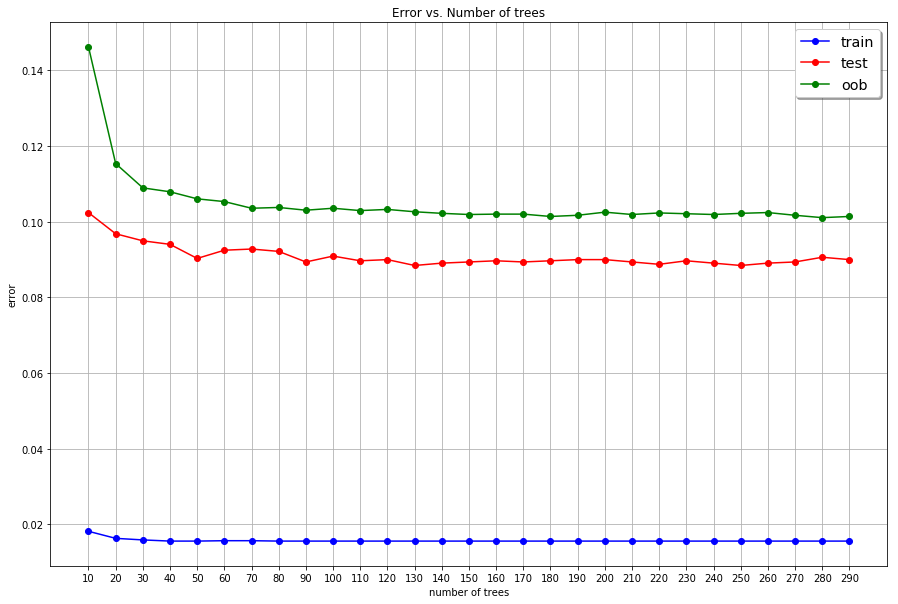

In [262]:
plt.figure(figsize = (15, 10))
plt.xticks([x for x in range(10, 300, 10)])
plt.grid(b=True)
plt.plot(n_estimators_arr, train_err, 'b-o', label="train")
plt.plot(n_estimators_arr, test_err, 'r-o', label = 'test')
plt.plot(n_estimators_arr, oob_err, 'g-o', label = 'oob')


plt.title('Error vs. Number of trees')
plt.xlabel('number of trees')
plt.ylabel('error')
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
pass

По графику можно сказать, что явно выраженных проблем с недообучением/переобучением не просматривается. Можно лишь сказать, что для количества деревьев меньше чем 40, можно наблюдать неообучение, т.е. наш классификатор не способен дать хороших результатов на тестовой выборке. Также на графике можем наблюдать тенденцию снижения значения out-of-bag ошибки с увиличением количества деревьев.

In [243]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
min_oob_err = np.min(oob_err)
print(min_train_err, min_test_err, min_oob_err)

0.015615305067218201 0.08839950372208437 0.10103412616339191


In [248]:
print(n_estimators_arr[test_err == min_test_err])
print(n_estimators_arr[oob_err == min_oob_err])

[130 250]
[280]


Построим классификаторы с оптимальными полученными значениями деревьев.

In [249]:
rf = ensemble.RandomForestClassifier(n_estimators = n_estimators_arr[test_err == min_test_err][0], random_state = 42)
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.015615305067218201 0.08839950372208437


In [250]:
rf = ensemble.RandomForestClassifier(n_estimators = n_estimators_arr[test_err == min_test_err][1], random_state = 42)
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.015615305067218201 0.08839950372208437


In [251]:
rf = ensemble.RandomForestClassifier(n_estimators = n_estimators_arr[oob_err == min_oob_err][0], random_state = 42)
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.015615305067218201 0.09057071960297766


Из полученных результатов видно, что ошибка на обучающей выборке у всех одинаковая, а значение на тестовой выборке немного отличается. Доверясь oob метрики, мы получили немного большую ошибку (всего на ~0.01%)

### Extremely Randomized Trees

In [252]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100, bootstrap=True, random_state = 42).fit(X_train, y_train)
y_test_predict = ert.predict(X_test)
train_error = np.mean(y_train != ert.predict(X_train))
test_error  = np.mean(y_test  != y_test_predict)

print(train_error, test_error)

0.015615305067218201 0.09522332506203474


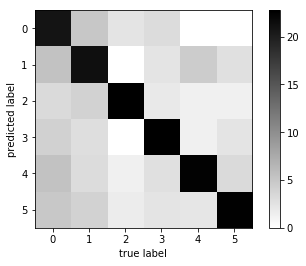

In [254]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(6))
plt.yticks(range(6))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
plt.show();

In [351]:
n_estimators_arr = range(10, 300, 10)
test_err = []
train_err = []
obb_err = []
for n_estimators in n_estimators_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = n_estimators, oob_score=True, bootstrap=True, random_state = 42)
    ert.fit(X_train, y_train)
    y_train_pred = ert.predict(X_train)
    y_test_pred = ert.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - ert.oob_score_)


d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\miniconda\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


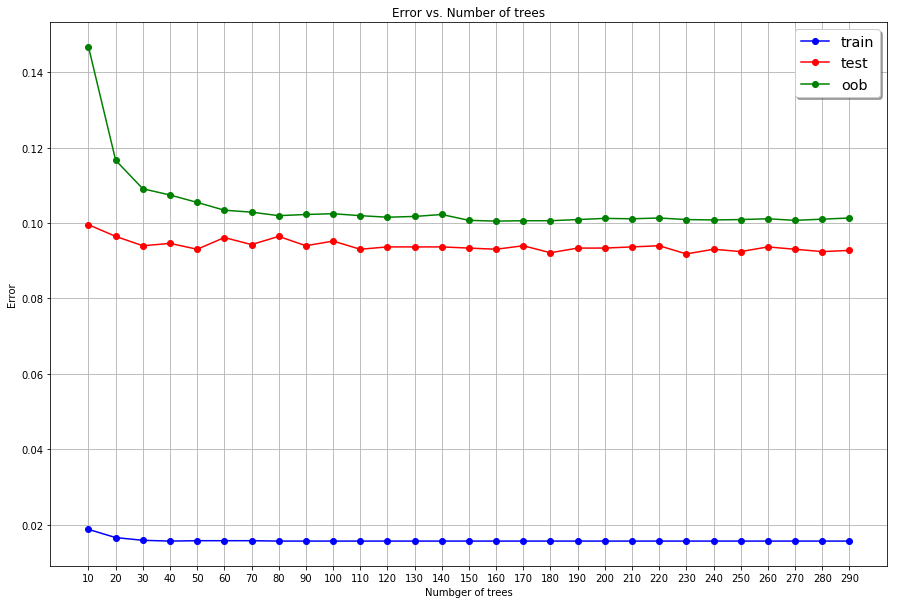

In [352]:
plt.figure(figsize = (15, 10))

plt.plot(n_estimators_arr, train_err, 'b-o', label="train")
plt.plot(n_estimators_arr, test_err, 'r-o', label = 'test')
plt.plot(n_estimators_arr, oob_err, 'g-o', label = 'oob')

plt.xticks(n_estimators_arr)
plt.xlabel('Numbger of trees')
plt.ylabel('Error')
plt.title('Error vs. Number of trees')
plt.legend(loc='upper right', shadow=True, fontsize='x-large');
plt.grid(b=True)

На данном графике oob-error можно заметить уменьшения значения ошибки с увеличением количества деревьев

In [353]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
min_oob_err = np.min(oob_err)
print(min_train_err, min_test_err, min_oob_err)

0.015615305067218201 0.09181141439205956 0.10051706308169595


Оптимальное количество деревьев

In [357]:
print(np.array(n_estimators_arr)[test_err == min_test_err])
print(np.array(n_estimators_arr)[oob_err == min_oob_err])

[230]
[160]


In [359]:
ert = ensemble.ExtraTreesClassifier(n_estimators = np.array(n_estimators_arr)[test_err == min_test_err][0], bootstrap=True, random_state = 42).fit(X_train, y_train)
y_test_predict = ert.predict(X_test)
train_error = np.mean(y_train != ert.predict(X_train))
test_error  = np.mean(y_test  != y_test_predict)

print(train_error, test_error)

0.015615305067218201 0.09181141439205956


In [360]:
ert = ensemble.ExtraTreesClassifier(n_estimators = np.array(n_estimators_arr)[oob_err == min_oob_err][0], bootstrap=True, random_state = 42).fit(X_train, y_train)
y_test_predict = ert.predict(X_test)
train_error = np.mean(y_train != ert.predict(X_train))
test_error  = np.mean(y_test  != y_test_predict)

print(train_error, test_error)

0.015615305067218201 0.09305210918114144


### AdaBoost

In [320]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000, random_state = 42)
ada.fit(X_train, y_train)
y_test_predict = ada.predict(X_test)
err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)

0.5166494312306101 0.544044665012407


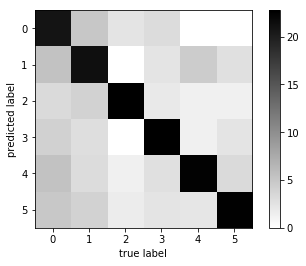

In [321]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(6))
plt.yticks(range(6))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
plt.show();

Подбор параметров

In [366]:
n_estimators_arr = range(100, 1500, 100)
test_err = []
train_err = []

for n_estimators in n_estimators_arr:
    ada = ensemble.AdaBoostClassifier(n_estimators = n_estimators, random_state = 42)
    ada.fit(X_train, y_train)
    
    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    print(n_estimators)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


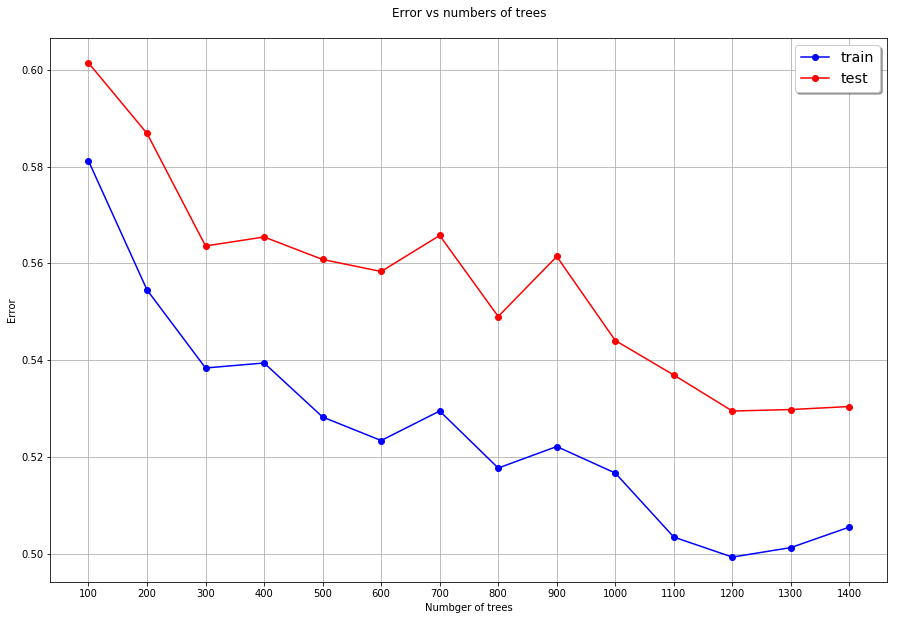

In [367]:
plt.figure(figsize = (15, 10))

plt.plot(n_estimators_arr, train_err, 'b-o', label="train")
plt.plot(n_estimators_arr, test_err, 'r-o', label = 'test')

plt.xticks(n_estimators_arr)

plt.xlabel('Numbger of trees')
plt.ylabel('Error')
plt.title('Error vs numbers of trees\n')
plt.legend(loc='upper right', shadow=True, fontsize='x-large');
plt.grid(b=True)

Оптимальное количество деревьев

In [368]:
n_estimators_opt = np.array(n_estimators_arr)[test_err==min(test_err)]
print(n_estimators_opt)

[1200]


In [371]:
ada = ensemble.AdaBoostClassifier(n_estimators = n_estimators_opt[0],  random_state = 42)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test  = np.mean(y_test  != ada.predict(X_test))

print(err_train, err_test)

0.49927611168562563 0.5294665012406948


### Gradient Boosting Trees

In [372]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000, random_state = 42)
gbt.fit(X_train, y_train)
y_test_predict = gbt.predict(X_test)
err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)

0.026059979317476733 0.10794044665012408


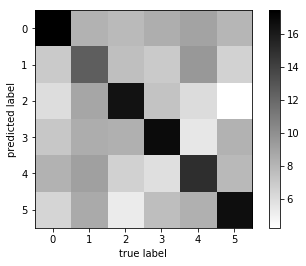

In [373]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(6))
plt.yticks(range(6))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
plt.show();

Подбор параметров

In [380]:
n_estimators_arr = range(100, 1000, 100)
test_err = []
train_err = []

for n_estimators in n_estimators_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = n_estimators, random_state = 42)
    gbt.fit(X_train, y_train)
    
    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    print(n_estimators)

100
200
300
400
500
600
700
800
900


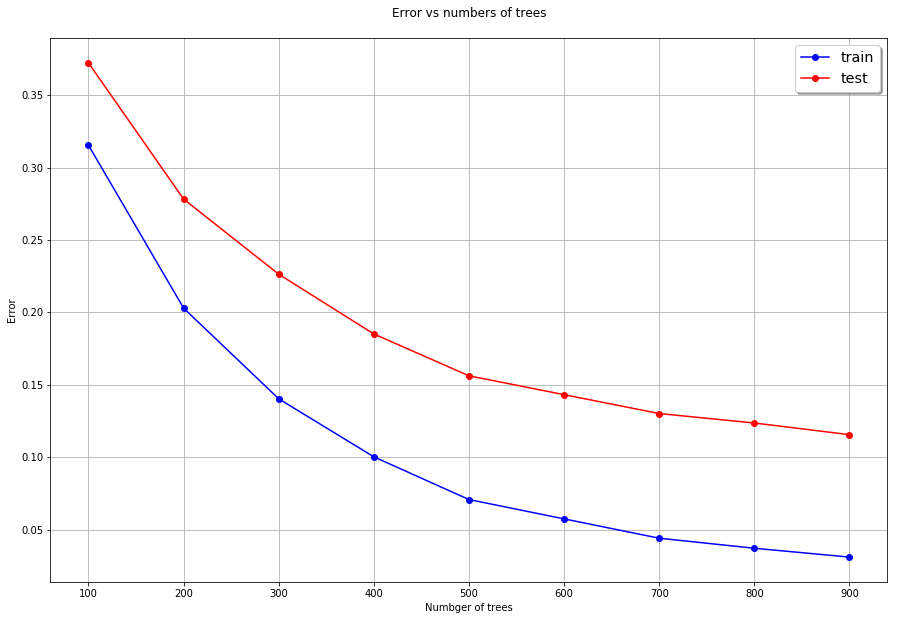

In [381]:
plt.figure(figsize = (15, 10))

plt.plot(n_estimators_arr, train_err, 'b-o', label="train")
plt.plot(n_estimators_arr, test_err, 'r-o', label = 'test')

plt.xticks(n_estimators_arr)

plt.xlabel('Numbger of trees')
plt.ylabel('Error')
plt.title('Error vs numbers of trees\n')
plt.legend(loc='upper right', shadow=True, fontsize='x-large');
plt.grid(b=True)

Оптимальное количество деревьев

In [382]:
n_estimators_opt = np.array(n_estimators_arr)[test_err==min(test_err)]
print(n_estimators_opt)

[900]


In [385]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = n_estimators_opt[0])
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))

print(err_train, err_test)

0.031230610134436402 0.11538461538461539


### Вывод

Наименьшую ошибку на тестовой выборке (0.08839950372208437) показал алгоритм Random Forest. Наибольшую (0.544044665012407) - Adaptive Boosting. Во всех случаях ошибка на тренировочной выборке минимальна (<1%) , кроме Adaptive Boosting (~50%), однако сильное переообучение не наблюдается. Oob-ошибка зависит от числа деревьев примерно также, как и ошибка на тестовой выборке. По сравнению с результатами предыдущих классификаторов ошибки на обучающей и тестовой выборках уменьшились.

## Лабораторная работа №4 

## PCA

Подберем оптимальное значение параметра n_components для PCA и построим графики зависимости ошибки (на тестовой и обучающей выборках) от количества компонент. Используем алгоритм RandomForest, так как в предыдущих экспериментах он показал наименьшую ошибку на тестовой выборке.

In [391]:
from sklearn import ensemble
from sklearn.decomposition import PCA

n_components_arr = np.arange(1,45,1) 
test_err = []
train_err = []
for n_components in n_components_arr:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    rf = ensemble.RandomForestClassifier(n_estimators = 130, random_state = 42)
    rf.fit(X_train_pca, y_train)
    y_train_pred = rf.predict(X_train_pca)
    y_test_pred = rf.predict(X_test_pca)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    print('Number of components: ', n_components)

Number of components:  1
Number of components:  2
Number of components:  3
Number of components:  4
Number of components:  5
Number of components:  6
Number of components:  7
Number of components:  8
Number of components:  9
Number of components:  10
Number of components:  11
Number of components:  12
Number of components:  13
Number of components:  14
Number of components:  15
Number of components:  16
Number of components:  17
Number of components:  18
Number of components:  19
Number of components:  20
Number of components:  21
Number of components:  22
Number of components:  23
Number of components:  24
Number of components:  25
Number of components:  26
Number of components:  27
Number of components:  28
Number of components:  29
Number of components:  30
Number of components:  31
Number of components:  32
Number of components:  33
Number of components:  34
Number of components:  35
Number of components:  36
Number of components:  37
Number of components:  38
Number of components:

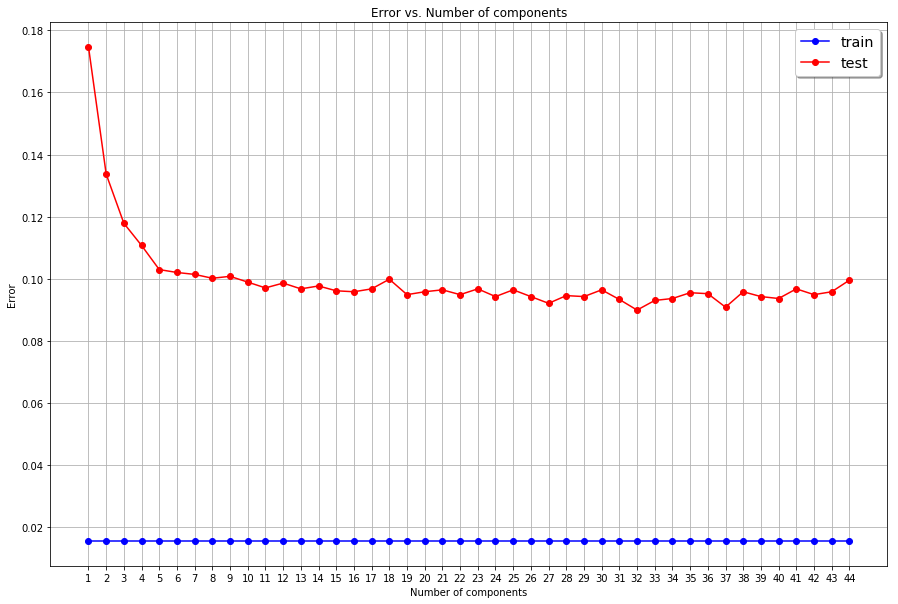

In [394]:
plt.figure(figsize = (15, 10))

plt.plot(n_components_arr, train_err, 'b-o', label="train")
plt.plot(n_components_arr, test_err, 'r-o', label = 'test')

plt.xticks(n_components_arr)

plt.xlabel('Number of components')
plt.ylabel('Error')
plt.title('Error vs. Number of components')
plt.legend(loc='upper right', shadow=True, fontsize='x-large');
plt.grid(b=True)
pass

Минимальное значение ошибки

In [395]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.015615305067218201 0.08995037220843673


Оптимальное число компонент

In [396]:
index = test_err.index(min_test_err)
n_components_opt = n_components_arr[index]
print(n_components_opt)

32


Классификатор при найденном оптимальном значении

In [397]:
pca = PCA(n_components=n_components_opt)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

rf = ensemble.RandomForestClassifier(n_estimators = 130, random_state = 42)
rf.fit(X_train_pca, y_train)
y_train_pred = rf.predict(X_train_pca)
y_test_pred = rf.predict(X_test_pca)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.015615305067218201
0.08995037220843673


In [398]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,All
True,,,,,,,
0,430,26,15,23,29,25,548
1,27,458,11,7,13,18,534
2,6,0,516,0,3,3,528
3,6,9,4,520,8,2,549
4,1,16,2,4,505,5,533
5,0,6,1,11,9,505,532
All,470,515,549,565,567,558,3224


### Вывод

Наилучшее значение количества компонент 32. Применение PCA не помогло снизить ошибку классификатора RandomForest на тестовой выборке. Без применения PCA ошибка была ~8.8%, с приминением PCA стала ~9%.

Подводя итоги работы, можно сделать вывод, что для данной задачи классификации наиболее точно работает модель обученная на алгоритме Random forest с оптимальным значением для параметра деревьев = 130 или = 250.